# Big Friday Sales Prediction

## Problem Statement
Big Friday is otherwise called as Black Friday. A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Data Description
The data contained features like age, gender, marital status, categories of products purchased, city demographics, purchase amount etc. The data consists of 12 columns and 537577 records. Our model will be predicting the purchase amount of the products.


## Importing Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import set_config

## Loading the training dataset

In [74]:
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [75]:
df_train.shape

(550068, 12)

Observation:
There are 550068 records and 12 attributes

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Observation:
1. Gender has two values and should be converted to binary values
2. Age should be treated as numerical column
3. City_category should be converted to numerical column and should look at the frequency of each city category
4. Product_Category_2 and Product_Category_3 have null values

## Checking Null Values

In [77]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Observation:
Product_Category_2 has 173638 null values and Product_Category_3 has 383247 null values

## Unique Elements in each attributes

In [78]:
df_train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

Observation:
We can drop User_ID and Product_ID as it has more unique values

## Exploratory Data Analysis

### Purchase

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

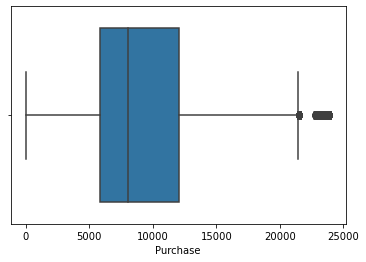

In [79]:
sns.boxplot(df_train['Purchase'])

In the boxplot, we can see that there are few values lying outside. But if we take a look at the z-score and check if they are above the usual threshold level (i.e.,3), we get no such values

In [80]:
from scipy import stats
z=np.abs(stats.zscore(df_train['Purchase']))
print(len(np.where(z>=3)[0]))

0


There are no major outliers.

### Gender

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender Vs Purchase')

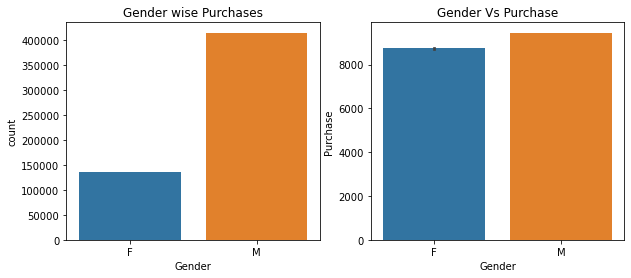

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df_train['Gender'], ax=ax[0])
ax[0].set_title("Gender wise Purchases")
sns.barplot('Gender', 'Purchase', data=df_train, ax=ax[1])
ax[1].set_title("Gender Vs Purchase")

From the above plotting, we can infer that the male gender spends more money on purchase contrary to female

### Age

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age Vs Purchase')

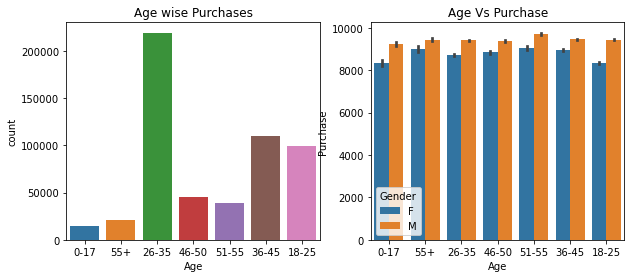

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df_train['Age'], ax=ax[0])
ax[0].set_title("Age wise Purchases")
sns.barplot('Age', 'Purchase', hue='Gender', data=df_train, ax=ax[1])
ax[1].set_title("Age Vs Purchase")

From the left plot, we can infer that age 26-35 group people makes the most number of purchases

From the right plot, all the age group people purchase rate tends to be the same except that the 51 - 55 age group has a little higher purchase amount spent.

### Occupation

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Occupation Vs Purchase')

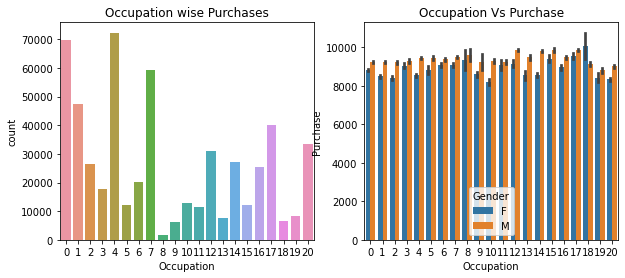

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df_train['Occupation'], ax=ax[0])
ax[0].set_title("Occupation wise Purchases")
sns.barplot('Occupation', 'Purchase', hue='Gender', data=df_train, ax=ax[1])
ax[1].set_title("Occupation Vs Purchase")

Although there are some occupations which have higher representations, it seems that the amount each user spent is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

### City_Category

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'City_Category Vs Purchase')

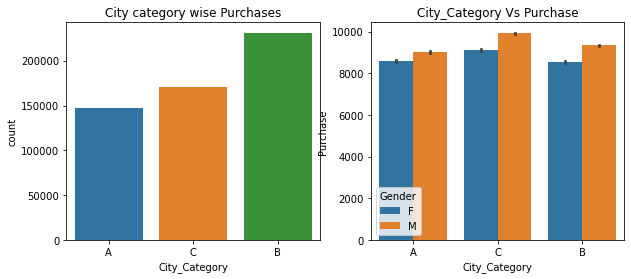

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df_train['City_Category'], ax=ax[0])
ax[0].set_title("City category wise Purchases")
sns.barplot('City_Category', 'Purchase', hue='Gender', data=df_train, ax=ax[1])
ax[1].set_title("City_Category Vs Purchase")

From the left plot, we can infer that City Category B has the most number of purchases

From the right plot, we can infer that the city whose buyers spend the most is city type 'C'

### Stay_In_Current_City_Years

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Stay_In_Current_City_Years Vs Purchase')

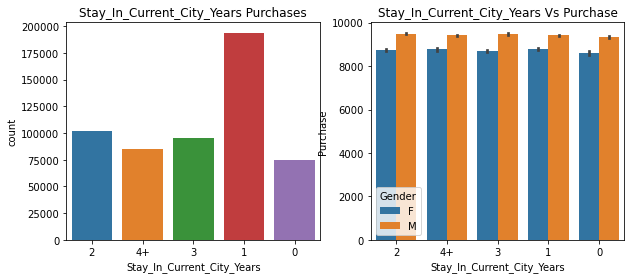

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df_train['Stay_In_Current_City_Years'], ax=ax[0])
ax[0].set_title("Stay_In_Current_City_Years Purchases")
sns.barplot('Stay_In_Current_City_Years', 'Purchase', hue='Gender', data=df_train,ax=ax[1])
ax[1].set_title("Stay_In_Current_City_Years Vs Purchase")

Inference of Left plot: It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

Inference of Right plot: We can see the same pattern. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years they have lived in their current city.

### Marital_Status

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Marital_Status Vs Purchase')

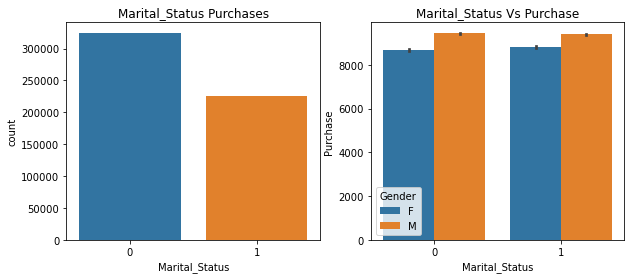

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df_train['Marital_Status'],ax=ax[0])
ax[0].set_title("Marital_Status Purchases")
sns.barplot('Marital_Status', 'Purchase', hue='Gender', data=df_train, ax=ax[1])
ax[1].set_title("Marital_Status Vs Purchase")

Inference of Left Plot: There are more unmarried people who purchases more.

Inference of Right Plot: The purchase amount of married and unmarried people are the same.

### Product_Category_1

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Product_Category_1 Vs Purchase')

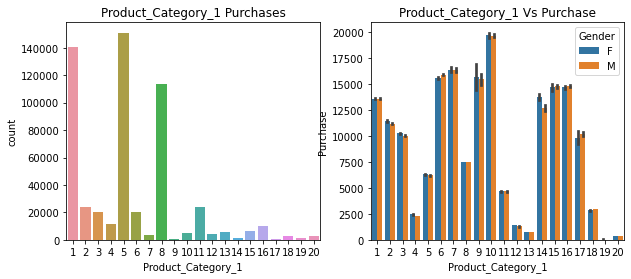

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df_train['Product_Category_1'], ax=ax[0])
ax[0].set_title("Product_Category_1 Purchases")
sns.barplot('Product_Category_1', 'Purchase', hue='Gender', data=df_train, ax=ax[1])
ax[1].set_title("Product_Category_1 Vs Purchase")

Inference of Left Plot: Three products 1,5 and 8 were three most sold products

Inference of Right Plot: Eventhough product 1,5 and 8 were three most sold products, the amount spent was not the highest. In Category 10, the amount was spent the highest.

### Product_Category_2

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Product_Category_2 Vs Purchase')

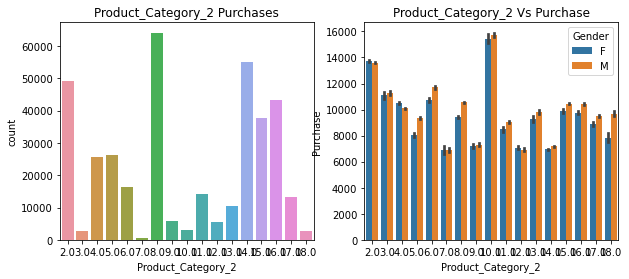

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df_train['Product_Category_2'], ax=ax[0])
ax[0].set_title("Product_Category_2 Purchases")
sns.barplot('Product_Category_2', 'Purchase', hue='Gender', data=df_train, ax=ax[1])
ax[1].set_title("Product_Category_2 Vs Purchase")

Inference of Left Plot: Product 2,8 and 14 were the three most sold products

Inference of Right Plot:
Eventhough product 2,8 and 14 were three most sold products, the amount spent was not the highest. In Category 10, the amount was spent the highest.

### Product_Category_3

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Product_Category_3 Vs Purchase')

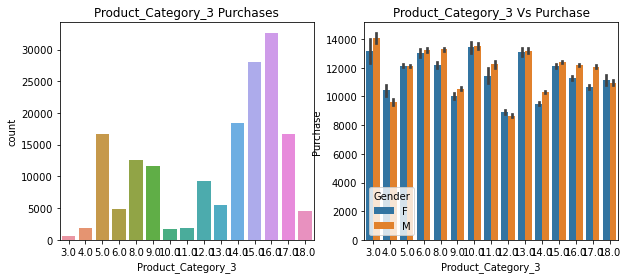

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df_train['Product_Category_3'],ax=ax[0])
ax[0].set_title("Product_Category_3 Purchases")
sns.barplot('Product_Category_3', 'Purchase', hue='Gender', data=df_train, ax=ax[1])
ax[1].set_title("Product_Category_3 Vs Purchase")

Inference of Left Plot: 16, 15 and 14 were the most sold products

Inference of Right Plot: Eventhough product 16, 15 and 14 were three most sold products, the amount spent was not the highest. In Category 1, the amount was spent the highest.

### Correlation

In [90]:
df_train.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


<AxesSubplot:>

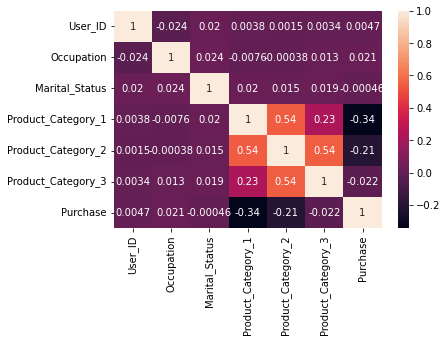

In [91]:
sns.heatmap(df_train.corr(), annot=True)

There is some correlation between the product category groups

## Dropping Irrelevant Columns

In [92]:
df=df_train.drop(["User_ID","Product_ID"],axis=1)

## Pipelines

Using Pipelines for
1. Numerical Data: \
    a.Handling Missing Values\
    b.Scaling
2. Categorical Data:<br /> 
    a.Handling Missing Values<br /> 
    b.Encoding
3. Training the model

Stages of Pipeline:<br /> 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Stage 1 - Preprocessing <br /> 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Stage 2 - Model Training

### Spliting data into independent & dependent variables

In [93]:
X=df.drop("Purchase",axis=1)
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,NaN,NaN
1,F,0-17,10,A,2,0,1,6.0,14.0
2,F,0-17,10,A,2,0,12,NaN,NaN
3,F,0-17,10,A,2,0,12,14.0,NaN
4,M,55+,16,C,4+,0,8,NaN,NaN


In [94]:
y=df['Purchase']
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

### Splitting Data as Train and Test Set

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Preprocessing and Model Training using Pipelines

In [96]:
numeric_columns= X.select_dtypes(include=['int','float']).columns

In [97]:
#Numerical
numeric_processor=Pipeline(
    steps=[("imputation_mode", SimpleImputer(missing_values=np.NaN,strategy="most_frequent")), 
            ("standard_scaler", StandardScaler())]
)

In [98]:
category_columns=X.select_dtypes(include=['category', 'object']).columns

In [99]:
#Categorical
from sklearn.preprocessing import OneHotEncoder
categorical_processor=Pipeline(
    steps=[("imputation_mean", SimpleImputer(fill_value="missing", strategy="constant")), 
            ("onehot", OneHotEncoder(handle_unknown="ignore"))]
) 

In [100]:
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(
    transformers=[("categorical", categorical_processor, category_columns),
    ("numerical", numeric_processor, numeric_columns)]
)

In [101]:
set_config(display="diagram")

In [102]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object'))])

### Linear Regression

In [103]:
from sklearn.pipeline import make_pipeline
lr=make_pipeline(preprocessor, LinearRegression())
lr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [104]:
lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [105]:
y_pred_lr=lr.predict(X_test)

In [106]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
mean_absolute_error(y_test, y_pred_lr)

3577.500398090906

In [107]:
mean_squared_error(y_test, y_pred_lr)

21939368.400408037

In [108]:
r2_score(y_test, y_pred_lr)

0.1294687391897228

In [109]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred_lr)))

RMSE of Linear Regression Model is  4683.947950224046


### Decision Tree Regressor

In [110]:
dt=make_pipeline(preprocessor, DecisionTreeRegressor(random_state=0))
dt

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object'))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])

In [111]:
dt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object'))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])

In [112]:
y_pred_dt=dt.predict(X_test)

In [113]:
mean_absolute_error(y_test, y_pred_dt)

2353.8488848596558

In [114]:
mean_squared_error(y_test, y_pred_dt)

11068710.60804262

In [115]:
r2_score(y_test, y_pred_dt)

0.5608051049917998

In [116]:
from math import sqrt
print("RMSE of Decision Tree Regressor model is ",sqrt(mean_squared_error(y_test, y_pred_dt)))

RMSE of Decision Tree Regressor model is  3326.9671786843073


### Random Forest Regressor

In [117]:
rf=make_pipeline(preprocessor, RandomForestRegressor(random_state=0))
rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object'))])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [118]:
rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object'))])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [119]:
y_pred_rf=rf.predict(X_test)

In [120]:
mean_absolute_error(y_test, y_pred_rf)

2222.0603014689486

In [121]:
mean_squared_error(y_test, y_pred_rf)

9313181.371922247

In [122]:
r2_score(y_test, y_pred_rf)

0.6304626744996233

In [123]:
from math import sqrt
print("RMSE of Random Forest Regressor Model is ",sqrt(mean_squared_error(y_test, y_pred_rf)))

RMSE of Random Forest Regressor Model is  3051.7505422170807


### XGBoost Regressor

In [124]:
xgb=make_pipeline(preprocessor, XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0))
xgb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputa...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=1.0,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None, min_child_weight=40,
                              missing=nan, monotone_constraints=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, predictor=None,
                              random_state=None, ...))])

In [125]:
model=xgb.fit(X_train, y_train)

In [126]:
y_pred_xgb=model.predict(X_test)

In [127]:
mean_absolute_error(y_test, y_pred_xgb)

2154.36370884106

In [128]:
mean_squared_error(y_test, y_pred_xgb)

8352447.859165689

In [129]:
r2_score(y_test, y_pred_xgb)

0.6685835784791153

In [130]:
from math import sqrt
print("RMSE of XGBoost Regressor Model is ",sqrt(mean_squared_error(y_test, y_pred_xgb)))

RMSE of XGBoost Regressor Model is  2890.0601826200245


The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2890

## Importing the Test Dataset

In [131]:
df_test=pd.read_csv("test.csv")
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [132]:
model.predict(df_test)

array([15166.357 , 11198.14  ,  7366.1855, ..., 12855.954 , 20992.107 ,
        1308.834 ], dtype=float32)